## End-to-End classifiatioN of veggies 🥦🥬

`Things that we are going to cover in todays session`

In [40]:
things_to_learn={1:'Check your tensorflow version',
                 2:'Import the required libraries',
                 3:'Walk through the data',
                 4:'Peform data augmentation',
                 5:"Check the number of classes",
                 6:'Build a CNN model(Wohhh here we are)',
                 7:'Compile your model',
                 8:'Fit the model',
                 9:'Check how well your model is(Putting it all together)',
                 10:'Check predictions of your model',
                 11:'Save your model'}
things_to_learn

{1: 'Check your tensorflow version',
 2: 'Import the required libraries',
 3: 'Walk through the data',
 4: 'Process the data',
 5: 'Peform data augmentation',
 6: 'Build a CNN model(Wohhh here we are)',
 7: 'Compile your model',
 8: 'Fit the model',
 9: 'Check how well your model is(Putting it all together)',
 10: 'Check predictions of your model',
 11: 'Save your model'}

### 1. Checking the TensorFlow Version

In [41]:
import tensorflow
print(tensorflow.__version__)

2.9.1


### 2. Importing the required libraries

In [43]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

### 3. Walking throught the directories

In [63]:
"""
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [64]:
walk_through_dir("/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/train")

There are 15 directories and 0 images in '/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/train'.
There are 0 directories and 1000 images in '/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/train/Capsicum'.
There are 0 directories and 1000 images in '/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/train/Radish'.
There are 0 directories and 1000 images in '/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/train/Pumpkin'.
There are 0 directories and 1000 images in '/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/train/Cauliflower'.
There are 0 directories and 1000 images in '/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/train/Potato'.
There are 0 directories and 1000 images in '/Users/at

In [65]:
train_dir = "/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/train"
test_dir = "/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/validation"
# test_path = "../input/vegetable-image-dataset/Vegetable Images/test"

In [10]:

# # from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Rescale the data and create data generator instances
# train_datagen = ImageDataGenerator(rescale=1/255.)
# test_datagen = ImageDataGenerator(rescale=1/255.)

# # Load data in from directories and turn it into batches
# train_data = train_datagen.flow_from_directory(train_dir,
#                                                target_size=(224, 224),
#                                                batch_size=32,
#                                                class_mode='categorical') # changed to categorical

# test_data = train_datagen.flow_from_directory(test_dir,
#                                               target_size=(224, 224),
#                                               batch_size=32,
#                                               class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


### 4. Perform Data Augmentation on the processed data

`How do we do this?`

* Setup your training and testing directories.
* Use python `ImageDataGenerator` to get and 'return' some set of transformed images.
* Normalize the data

In [66]:
# Create augmented data generator instance
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')
test_data_augmented = train_datagen_augmented.flow_from_directory(test_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')



Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


### 5. Number of Classes

In [82]:
class_names=list(train_data_augmented.class_indices.keys())
print(class_names)
print(len(class_names))

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
15


### 6. Here comes the most interesting part for which we all have been waiting for

**Build your own model**

`We will building a CNN model which would be consisting of following layers`
* Convolutional layers
* Pooling layers
* Flatten layers
* Output layer(Not to forget this)

In [73]:
# Create our model (a clone of model_8, except to be multi-class)
model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(15, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

### 7. Compile the model you have built

In [75]:
# Compile the model
model.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer="adam",
                metrics=["accuracy"])

### Setting up `EarlyStoppingCallback`
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [76]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    baseline=None,
    restore_best_weights=True,
)

### 8. Fitting the model

In [80]:
# Fit the model
history_model = model.fit(train_data_augmented, # now 10 different classes 
                        epochs=5,
                        batch_size=32,
                        validation_data=test_data_augmented,
                        callbacks=[early_stopping])

Epoch 1/5
469/469 [==============================] - ETA: 0s - loss: 0.6266 - accuracy: 0.8013

KeyboardInterrupt: 

### 9. Checking how well your predictions are

In [54]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

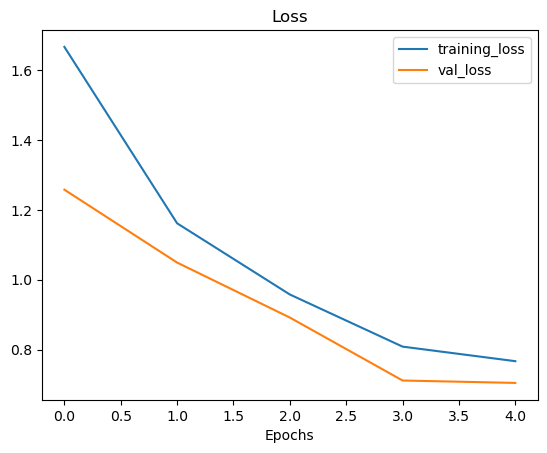

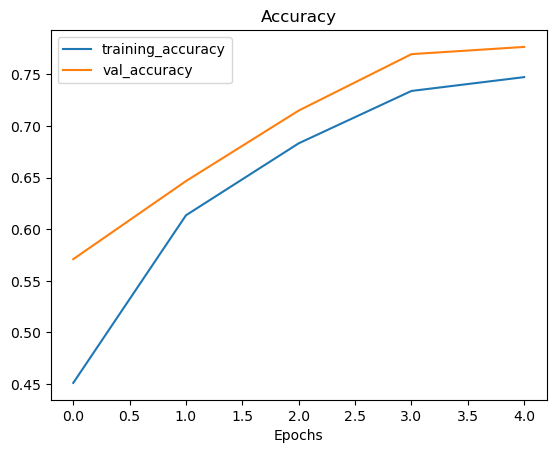

In [55]:
# Check out our model's training curves
plot_loss_curves(history_model)

### 10. Check your model predictions

In [56]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [57]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[pred.argmax()] # if more than one output, take the max
  
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 99ms/step


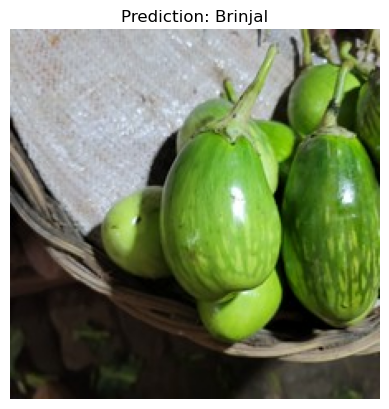

In [62]:
pred_and_plot(model, '/Users/atharvaraut/Documents/1.MACHINE LEARNING/QUARK_AL:ML/aiml-workshop-ml-main/Vegetable Images/test/Brinjal/0871.jpg', class_names)

### 11. Saving the model

In [16]:
model.save("model_1.h5")

## Transfer Learning🧠🧑‍🍳

In [ ]:
# pred_and_plot(loaded_model,"/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Brinjal/0915.jpg",class_names)

In [31]:
IMG_SIZE= (224,224)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMG_SIZE,
    batch_size=64)

Found 15000 images belonging to 15 classes.


In [32]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb",     
    class_mode="categorical",
    target_size=IMG_SIZE,
    batch_size=64)

Found 3000 images belonging to 15 classes.


In [33]:
models = ("inception_v3", 299, 2048) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = models
Model_URL="https://tfhub.dev/google/tf2-preview/{}/feature_vector/2".format(handle_base)

print("Using {} with input size {} and output dimension {}".format(
  Model_URL, IMG_SIZE, FV_SIZE))

BATCH_SIZE = 64 #@param {type:"integer"}

Using https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2 with input size (224, 224) and output dimension 2048


In [34]:
import tensorflow_hub as hub
feature_vectorizer=hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_075_224/quantops/feature_vector/3",
                                  input_shape=IMG_SIZE+(3,))

2023-03-23 23:07:48.887270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-23 23:07:49.048653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [35]:
inputs=tf.keras.layers.Input(shape=(224,224,3))
x=feature_vectorizer(inputs) 
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
x=tf.keras.layers.Dense(256, activation='relu')(x)
# x=feature_vectorizer(x)
x=tf.keras.layers.Dense(128, activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=tf.keras.layers.Dense(train_generator.num_classes,activation="softmax")(x)
model_1=tf.keras.Model(inputs,outputs)
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 keras_layer (KerasLayer)    (None, 768)               1833084   
                                                                 
 flatten_1 (Flatten)         (None, 768)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               393728    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0   

In [36]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=5)
history_model_1 = model_1.fit(train_generator,
                                 epochs=15,
                                 steps_per_epoch=len(train_generator),
                                 validation_data=test_generator,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_generator)),
                             callbacks=[early_stopping])

Epoch 1/15


2023-03-23 23:07:50.876493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.2337 - accuracy: 0.9331

2023-03-23 23:09:39.961497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 116s 466ms/step - loss: 0.2337 - accuracy: 0.9331 - val_loss: 0.0195 - val_accuracy: 0.9929
Epoch 2/15
235/235 [==============================] - 107s 455ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 3/15
 46/235 [====>.........................] - ETA: 1:23 - loss: 0.0283 - accuracy: 0.9922

KeyboardInterrupt: 

In [ ]:
model_1.save("Feature_Vectorizer_model1.h5")

In [ ]:
pred_and_plot(model_1,"/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Broccoli/1009.jpg",class_names)

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/kaggle/working/Feature_Vectorizer_model1.h5', custom_objects={'KerasLayer':hub.KerasLayer})
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("feature_vectorizer_converted_model.tflite", "wb").write(tflite_model)